In [106]:
import pymolpro
import pandas as pd

In [107]:
backend = 'local' 
project_name = 'BH76_methodtest'
parallel = 8

In [108]:
methods = {"HF": "hf",
"MP2": "mp2",
"MP3": "mp3",
"MP4": "mp4",
"PAPT2":"PAPT;MP2",
"PAPT3":"PAPT;MP3",
"PAPT4":"PAPT;MP4",
"CCSD":"CCSD",
"CCSD(T)":"CCSD(T)" }
bases = ['cc-pVDZ','cc-pVTZ']

In [109]:
db = pymolpro.database.load("GMTKN55_BH76")

In [110]:
small=db.subset(open_shell=False,max_electrons=30)
print(small)

GMTKN55 BH76 (closed shell only) (maximum number of electrons 30):

Molecules:
ch3f: {'geometry': '           5\n  \n    C          0.00000000      0.00000000      0.06556637\n    F          0.00000000      0.00000000     -1.31562859\n    H          0.51491633     -0.89186125      0.41668741\n    H          0.51491633      0.89186125      0.41668741\n    H         -1.02983267      0.00000000      0.41668741\n', 'description': 'ch3f'}
fch3fcomp: {'geometry': '           6\n  \n    F          0.00000000      0.00000000     -1.79137135\n    C          0.00000000      0.00000000     -0.36561703\n    H         -0.51179113      0.88644824     -0.01758668\n    H         -0.51179113     -0.88644824     -0.01758668\n    H          1.02358226      0.00000000     -0.01758668\n    F          0.00000000      0.00000000      2.20974841\n', 'description': 'fch3fcomp', 'charge': -1}
fch3fts: {'geometry': '           6\n  \n    F          1.82355879      0.00051927      0.00010874\n    C          0.000

In [111]:
results = {}
for method in methods:
    results[method] = {}
    for basis in bases:
        results[method][basis] = pymolpro.database.run(small, methods[method], basis, location=project_name,
                                                       preamble= 'angstrom' ,backend=backend ,parallel=parallel)
        if results[method][basis].failed: print(method, basis, 'failed', results[method][basis].project_directory)
        
print(results)    

{'HF': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f8ef3b75e10>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f8ef3fde8f0>}, 'MP2': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f8ef3cfc820>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f8ef3b754b0>}, 'MP3': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f8ef3b360b0>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f8ef3b36500>}, 'MP4': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f8ef3ba5b70>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f8ef3ba5a80>}, 'PAPT2': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f8ef3ba5600>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f8ef3ba5150>}, 'PAPT3': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f8eb6278850>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f8eb62d8790>}, 'PAPT4': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f8ef3ba7430>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f8ef3b85b70>}, 'CCSD':

In [112]:
extrapolate={}
for method in  methods:
    extrapolate[method]=pymolpro.database.basis_extrapolate                   (results[method].values(), results["HF"].values())[0]
print(extrapolate)

{'HF': <pymolpro.database.Database object at 0x7f8ef3b85240>, 'MP2': <pymolpro.database.Database object at 0x7f8ef3b858d0>, 'MP3': <pymolpro.database.Database object at 0x7f8ef3cff820>, 'MP4': <pymolpro.database.Database object at 0x7f8ef3cff6d0>, 'PAPT2': <pymolpro.database.Database object at 0x7f8ef3cff370>, 'PAPT3': <pymolpro.database.Database object at 0x7f8ef3cff190>, 'PAPT4': <pymolpro.database.Database object at 0x7f8ef3cff9a0>, 'CCSD': <pymolpro.database.Database object at 0x7f8ef3cff670>, 'CCSD(T)': <pymolpro.database.Database object at 0x7f8ef3cffac0>}


In [113]:
results_with_extrapolation = results
for method in results_with_extrapolation.keys():
    results_with_extrapolation[method]['cc-pV[23]Z'] = extrapolate[method]
results_with_extrapolation
results = results_with_extrapolation

pd.options.display.float_format = '{:,.2f}'.format
analyse=pymolpro.database.analyse([result['cc-pV[23]Z'] for result in results.values()],results['CCSD(T)']['cc-pV[23]Z'],unit='kJ/mol')
analyse['reaction statistics']

,HF/cc-pV[23]Z,MP2/cc-pV[23]Z,MP3/cc-pV[23]Z,MP4/cc-pV[23]Z,PAPT;MP2/cc-pV[23]Z,PAPT;MP3/cc-pV[23]Z,PAPT;MP4/cc-pV[23]Z,CCSD/cc-pV[23]Z,CCSD(T)/cc-pV[23]Z
MAD,35.28,3.84,17.89,7.12,15.43,15.46,2.90,10.05,0.00
MAXD,60.41,18.08,26.86,10.52,22.78,22.73,3.72,16.26,0.00
RMSD,39.15,6.30,19.05,7.51,16.29,16.30,3.09,10.98,0.00
MSD,35.06,3.68,17.89,-5.74,15.43,15.46,2.90,10.05,0.00
STDEVD,18.35,5.39,6.92,5.10,5.49,5.46,1.12,4.67,0.00


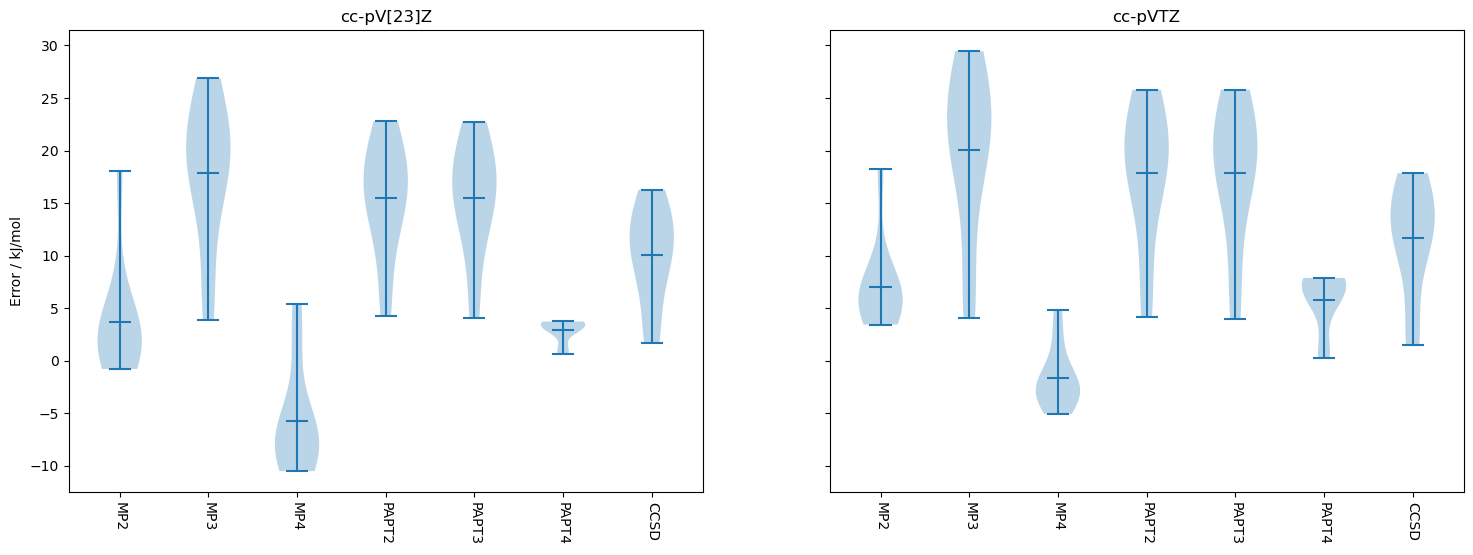

In [114]:
import matplotlib.pyplot as plt

methods_pruned = [method for method in methods if (method != 'HF') and (method != 'CCSD(T)')]
bases_pruned = ['cc-pV[23]Z', 'cc-pVTZ']
fig, panes = plt.subplots(nrows=1, ncols=len(bases_pruned), sharey=True, figsize=(18, 6))

for pane in range(len(bases_pruned)):
    data = []
    for method in methods_pruned:
        data.append(
            pymolpro.database.analyse(results[method][bases_pruned[pane]],
                                      results['CCSD(T)']['cc-pV[23]Z'],'kJ/mol')['reaction energy deviations'].to_numpy()[:, 0]
        )
    panes[pane].violinplot(data, showmeans=True, showextrema=True, vert=True, bw_method='silverman')
    panes[pane].set_xticks(range(1, len(methods_pruned) + 1), labels=methods_pruned, rotation=-90)
    panes[pane].set_title(bases_pruned[pane])
panes[0].set_ylabel('Error / kJ/mol')
plt.savefig(project_name + ".violin.pdf")
df = pd.DataFrame(data)
df.to_excel("PAPT.xlsx")

In [87]:
extrapolate=pymolpro.database.basis_extrapolate(results[method].values(), results["HF"].values())
extrapolate